In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Data and studying it

In [3]:
df=pd.read_csv('Fraud.csv', index_col=0)

In [4]:
df.shape

(6362620, 10)

In [5]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.iloc[0:100, :]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0


In [6]:
df.shape

(6362620, 10)

In [8]:
#Checking for missing values

In [9]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
#Total number of frauds and flagged frauds

df['isFraud'].sum()

8213

In [12]:
df['isFlaggedFraud'].sum()

16

### Helper Variables to Analyse better

In [7]:
#Making a column to check if the dest is a merchant
df_dummy=df
df_dummy['is_merchant_dest'] = df_dummy['nameDest'].str.startswith("M").astype(int)

In [8]:
df_dummy.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_merchant_dest
step,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [9]:
# Sender-side inconsistency
df_dummy["errorOrig"] = df_dummy["oldbalanceOrg"] - df_dummy["amount"] - df_dummy["newbalanceOrig"]

# Receiver-side inconsistency
df_dummy["errorDest"] = df_dummy["oldbalanceDest"] + df_dummy["amount"] - df_dummy["newbalanceDest"]

# Ratio of transaction size to account balance
df_dummy["trans_ratio"] = df_dummy["amount"] / (df_dummy["oldbalanceOrg"] + 1)

# Ratio of balance left after transaction to starting balance
df_dummy["balance_left_ratio"] = df_dummy["newbalanceOrig"] / (df_dummy["oldbalanceOrg"] + 1)

In [10]:
df_dummy.replace([np.inf, -np.inf], np.nan, inplace=True)   #the ratios can blow up because of infinite value

In [11]:
df_dummy[["trans_ratio", "balance_left_ratio"]].isna().mean()

trans_ratio           0.0
balance_left_ratio    0.0
dtype: float64

### Univariate Analysis

In [12]:
num_cols = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest",
            "errorOrig","errorDest","trans_ratio","balance_left_ratio"]
df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorOrig,errorDest,trans_ratio,balance_left_ratio
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,-2.010925e+05,5.556717e+04,7.067448e+04,3.854081e+02
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,6.066505e+05,4.415288e+05,5.084243e+05,9.987283e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.244552e+07,-7.588573e+07,0.000000e+00,0.000000e+00
1%,4.494676e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.559495e+06,-3.534017e+05,2.229226e-03,0.000000e+00
5%,2.224100e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.007168e+05,-1.000000e-02,1.200811e-02,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.496411e+05,0.000000e+00,2.344011e-01,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,-6.867726e+04,3.500490e+03,6.453832e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,-2.954230e+03,2.935305e+04,1.228776e+04,9.765140e-01
95%,5.186342e+05,5.823702e+06,5.980262e+06,5.147230e+06,5.515716e+06,0.000000e+00,4.567410e+05,3.128354e+05,5.337348e+00


In [106]:
df_dummy['isFraud'].sum()

8213

In [107]:
df['isFlaggedFraud'].sum()

16

In [108]:
df_dummy['type'].value_counts()     #the differente types of payments

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [109]:
df["is_merchant_dest"].value_counts()    #the merchants vs non merchants

is_merchant_dest
0    4211125
1    2151495
Name: count, dtype: int64

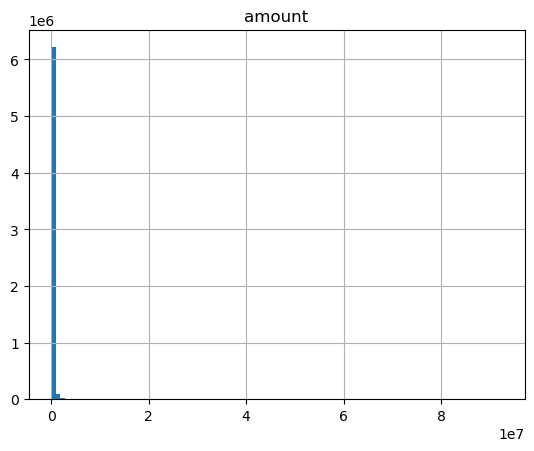

In [110]:
df_dummy["amount"].hist(bins=100)
plt.title("amount")
plt.show()


In [111]:
#since the prev was ultra skewed we check for log values as well

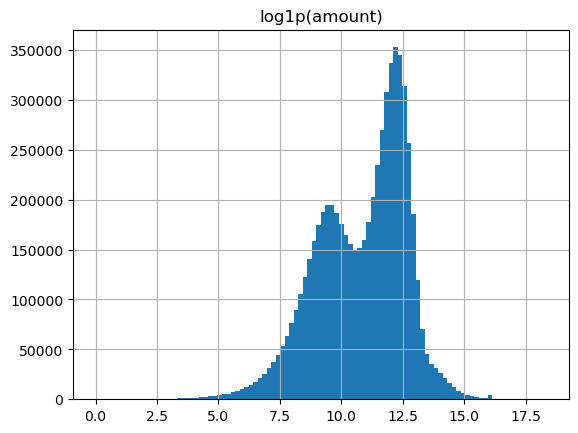

In [13]:
np.log1p(df_dummy["amount"]).hist(bins=100)    #log(1+x) to handle zeros
plt.title("log1p(amount)")
plt.show()

In [113]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [114]:
#We see the median amount is around 
np.exp(12.5)-1

268336.2865208745

#### Doing the KS test to see the cols which seperate legit vs fraud the most

In [115]:
from scipy.stats import ks_2samp
y = df["isFraud"].values
scores = []
for col in num_cols:
    legit = df.loc[df.isFraud==0, col].dropna()
    fraud = df.loc[df.isFraud==1, col].dropna()
    ks = ks_2samp(legit, fraud).statistic
    scores.append((col, ks))
sorted(scores, key=lambda x: -x[1])[:10]


[('errorOrig', 0.8083923804987693),
 ('trans_ratio', 0.6383839858816427),
 ('oldbalanceOrg', 0.5425251288690744),
 ('amount', 0.44413630807251875),
 ('newbalanceOrig', 0.4137446384243786),
 ('balance_left_ratio', 0.4137446384243786),
 ('oldbalanceDest', 0.24472645288980366),
 ('errorDest', 0.22886040535594154),
 ('newbalanceDest', 0.11523381783959835)]

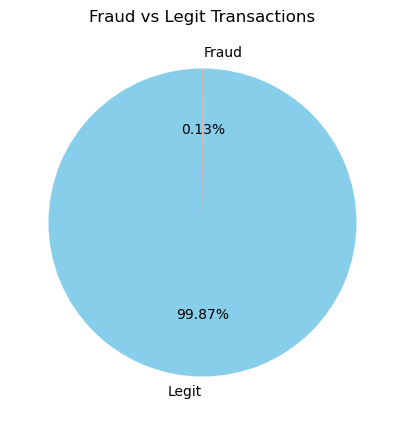

In [116]:
fraud_cnt=df_dummy['isFraud'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    fraud_cnt,
    labels=["Legit", "Fraud"],
    autopct="%1.2f%%",
    startangle=90,
    colors=["skyblue", "salmon"]
)
plt.title("Fraud vs Legit Transactions")
plt.show()

### Bivariate Analysis

### type vs Fraud

In [117]:
fraud_rate_by_type = df.groupby("type")["isFraud"].sum()
fraud_rate_by_type

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

In [118]:
# The most frequent fraud type is CASH_OUT AND PAYMENT

In [119]:
fraud_rate_by_merchant = df.groupby("is_merchant_dest")["isFraud"].sum()
fraud_rate_by_merchant

is_merchant_dest
0    8213
1       0
Name: isFraud, dtype: int64

In [120]:
#no Fraud by merchants

### Amount vs isFraud

In [121]:
plt.figure()
df_dummy.loc[df_dummy.isFraud==0,"log(amount)"].plot(kind="kde", label="Legit")
df_dummy.loc[df_dummy.isFraud==1,"log(amount)"].plot(kind="kde", label="Fraud")
plt.legend()
plt.title("Log amount vs Fraud")


KeyError: 'log(amount)'

<Figure size 640x480 with 0 Axes>

# The data concludes that for Normal amounts the legit transactions are greter than fraud , but for higher amounts the legit transactions drops significantly 

In [14]:
df_dummy["log(amount)"]=np.log1p(df_dummy['amount'])

In [15]:
df_dummy.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,trans_ratio,balance_left_ratio,log(amount)
step,,,,,,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0.0,9839.64,0.057834,0.942160,9.194276
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0.0,1864.28,0.087731,0.912222,7.531166
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0.0,181.00,0.994505,0.000000,5.204007
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0.0,21363.00,0.994505,0.000000,5.204007
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0.0,11668.14,0.280788,0.719188,9.364703


In [ ]:
plt.figure()
np.log1p(df_dummy.loc[df_dummy.isFraud==0,"errorOrig"]).plot(kind="kde", label="Legit")
np.log1p(df_dummy.loc[df_dummy.isFraud==1,"errorOrig"]).plot(kind="kde", label="Fraud")
plt.legend()
plt.title("error vs Fraud")

In [ ]:
plt.figure()
np.log1p(df_dummy.loc[df_dummy.isFraud==0,"errorDest"]).plot(kind="kde", label="Legit")
np.log1p(df_dummy.loc[df_dummy.isFraud==1,"errorDest"]).plot(kind="kde", label="Fraud")
plt.legend()
plt.title("error vs Fraud")

In [ ]:
#This indicates that errorOrig dosent have much correlation with fraud but errorDest has

### TIME VS FRAUD

In [16]:
step_stats = pd.DataFrame({
    "total_tx": df.groupby("step")["type"].count(),    #total transactions at that time/step
    "fraud_tx": df[df["isFraud"] == 1].groupby("step")["type"].count()    #total fradulent transactions at that time/step
})
step_stats["fraud_rate"] = step_stats["fraud_tx"] / step_stats["total_tx"]
print(step_stats.head())


      total_tx  fraud_tx  fraud_rate
step                                
1         2708      16.0    0.005908
2         1014       8.0    0.007890
3          552       4.0    0.007246
4          565      10.0    0.017699
5          665       6.0    0.009023


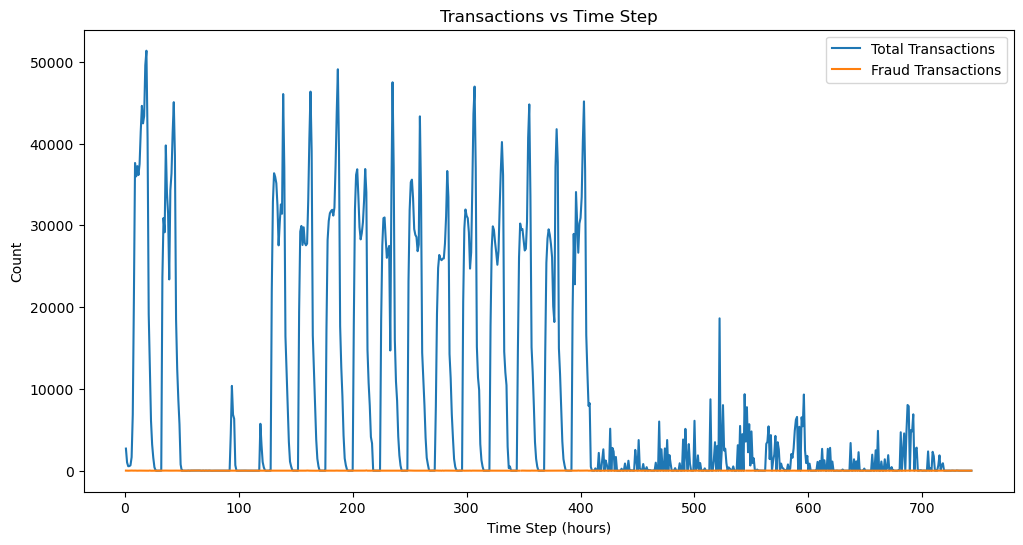

In [17]:

plt.figure(figsize=(12,6))
plt.plot(step_stats.index, step_stats["total_tx"], label="Total Transactions")
plt.plot(step_stats.index, step_stats["fraud_tx"], label="Fraud Transactions")
plt.xlabel("Time Step (hours)")
plt.ylabel("Count")
plt.title("Transactions vs Time Step")
plt.legend()
plt.show()


In [125]:
#The Frauds are almost negligible. thus no use of this info

In [126]:
#Now we group step with type

In [18]:
# total transactions per step per type
total_by_type_step = df.groupby(["step", "type"]).size().unstack(fill_value=0)

# fraud transactions per step per type
fraud_by_type_step = df[df["isFraud"] == 1].groupby(["step", "type"]).size().unstack(fill_value=0)


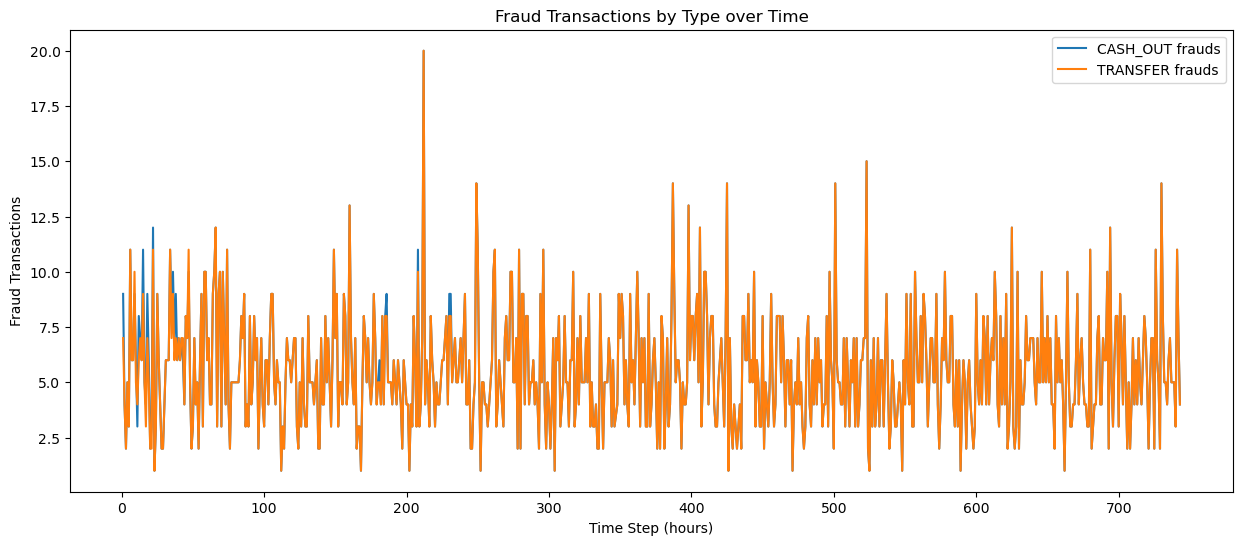

In [19]:
plt.figure(figsize=(15,6))
for t in fraud_by_type_step.columns:
    plt.plot(fraud_by_type_step.index, fraud_by_type_step[t], label=f"{t} frauds")
plt.xlabel("Time Step (hours)")
plt.ylabel("Fraud Transactions")
plt.title("Fraud Transactions by Type over Time")
plt.legend()
plt.show()

In [20]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,trans_ratio,balance_left_ratio,log(amount)
step,,,,,,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0.0,9839.64,0.057834,0.942160,9.194276
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0.0,1864.28,0.087731,0.912222,7.531166
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0.0,181.00,0.994505,0.000000,5.204007
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0.0,21363.00,0.994505,0.000000,5.204007
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0.0,11668.14,0.280788,0.719188,9.364703


In [21]:
df["day"] = df.index // 24

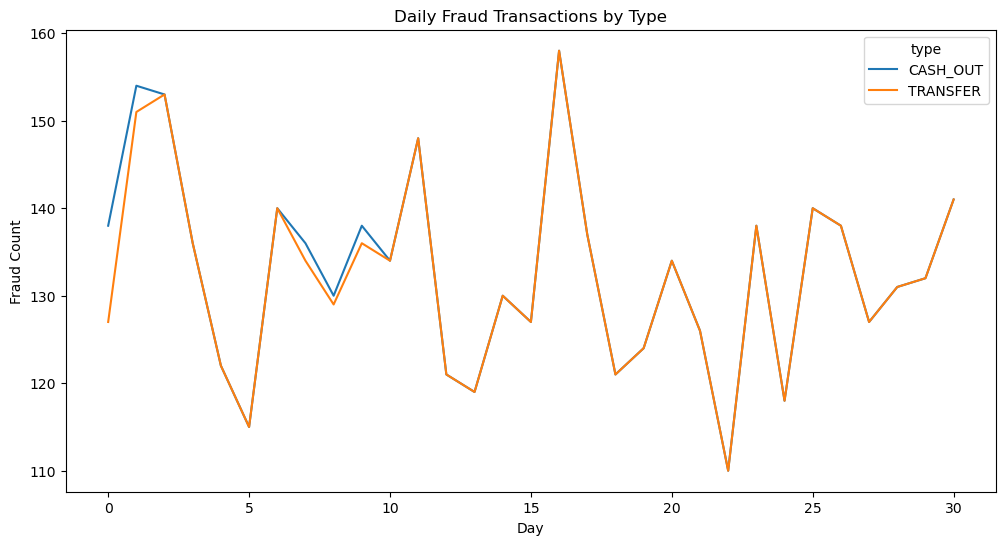

In [163]:
# group by day (24 hours)
frauds = df[df.isFraud == 1]

daily_frauds = frauds.groupby(["day", "type"]).size().unstack(fill_value=0)

daily_frauds.plot(kind="line", figsize=(12,6))
plt.title("Daily Fraud Transactions by Type")
plt.ylabel("Fraud Count")
plt.xlabel("Day")
plt.show()


In [22]:
#add day column in df_dummy
df_dummy['day']=df['day']

In [23]:
#Conclude : We see a spike of frauds using "transfer" of fund in time =200

### isFraud vs isFlaggedFraud

In [24]:
pd.crosstab(df["isFraud"], df["isFlaggedFraud"], 
            rownames=["Actual Fraud"], colnames=["Flagged Fraud"])


Flagged Fraud,0,1
Actual Fraud,,
0,6354407,0
1,8197,16


In [166]:
# Thus it is almost certain that transaction which gets flagged are definetly fraud. But system fails to flag many actual frauds

In [25]:
df.groupby("isFlaggedFraud")["amount"].describe()
#We see that system is getting triggered only for amounts very high the min being 300k+

,count,mean,std,min,25%,50%,75%,max
isFlaggedFraud,,,,,,,,
0,6362604.0,1.798501e+05,6.037884e+05,0.00,1.338955e+04,74871.270,2.087205e+05,92445516.64
1,16.0,4.861598e+06,3.572499e+06,353874.22,2.242749e+06,4234245.095,7.883451e+06,10000000.00


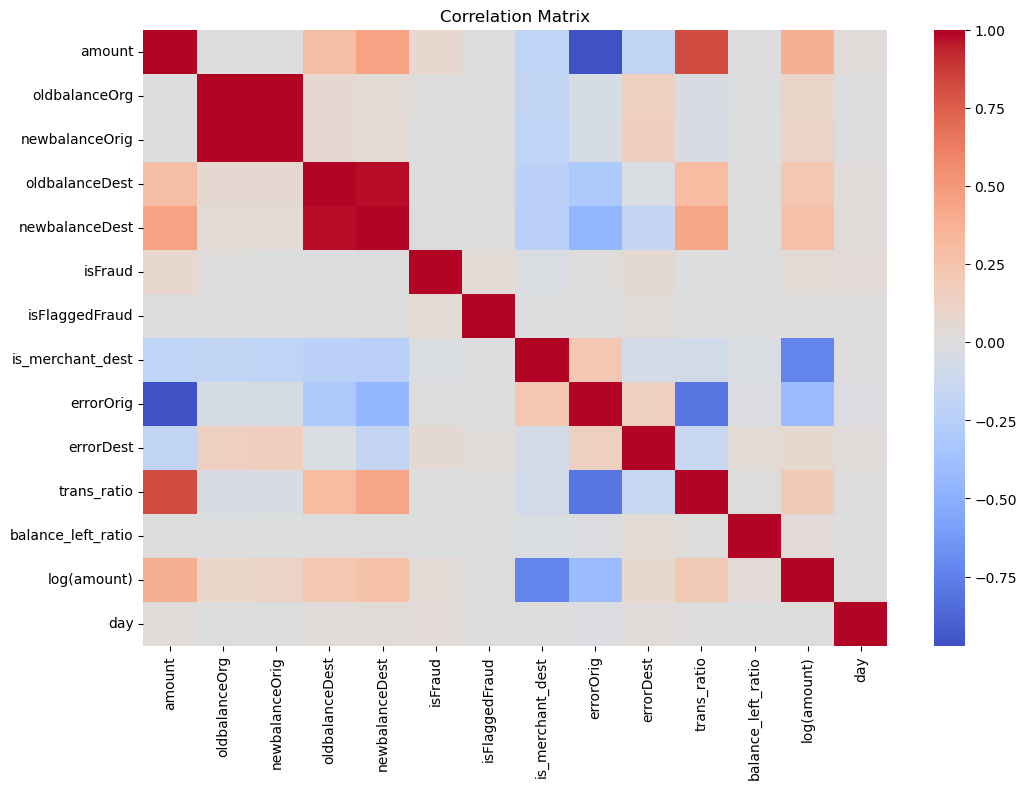

In [168]:
# 1. Select only numeric columns
num_cols = df_dummy.select_dtypes(include=["number"]).columns

# 2. Compute correlation
corr = df_dummy[num_cols].corr()

# 3. Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
corr_with_fraud = corr["isFraud"].sort_values(ascending=False)
print(corr_with_fraud)


In [ ]:
#this shows that columns like amount, erroDest, isFlagged, log(amount), errorOrig, oldbalanceOrg are the most important

In [26]:
df_dummy2 = df_dummy[~df_dummy["nameDest"].str.startswith("M")] #remove merchants from data , it will reduce noise for model trainning
df_dummy2.shape

(4211125, 17)

In [27]:
df_dummy2=df_dummy2.drop(columns=[ "nameOrig", 
                                   "newbalanceOrig",
                                  "oldbalanceDest", "newbalanceDest","trans_ratio","balance_left_ratio"])

In [28]:
df_dummy2.head()

,type,amount,oldbalanceOrg,nameDest,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day
step,,,,,,,,,,,
1,TRANSFER,181.00,181.0,C553264065,1,0,0,0.000000e+00,181.00,5.204007,0
1,CASH_OUT,181.00,181.0,C38997010,1,0,0,0.000000e+00,21363.00,5.204007,0
1,DEBIT,5337.77,41720.0,C195600860,0,0,0,-7.275958e-12,6886.98,8.582751,0
1,DEBIT,9644.94,4465.0,C997608398,0,0,0,-5.179940e+03,-137492.18,9.174292,0
1,CASH_OUT,229133.94,15325.0,C476402209,0,0,0,-2.138089e+05,182703.50,12.342066,0


In [29]:
df_dummy2.shape

(4211125, 11)

In [30]:
df_dummy2=df_dummy2.drop(columns=["nameDest"])

In [31]:
df_dummy2.head()

,type,amount,oldbalanceOrg,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day
step,,,,,,,,,,
1,TRANSFER,181.00,181.0,1,0,0,0.000000e+00,181.00,5.204007,0
1,CASH_OUT,181.00,181.0,1,0,0,0.000000e+00,21363.00,5.204007,0
1,DEBIT,5337.77,41720.0,0,0,0,-7.275958e-12,6886.98,8.582751,0
1,DEBIT,9644.94,4465.0,0,0,0,-5.179940e+03,-137492.18,9.174292,0
1,CASH_OUT,229133.94,15325.0,0,0,0,-2.138089e+05,182703.50,12.342066,0


In [32]:
df_dummy2 = df_dummy2.reset_index(drop=True)


In [33]:
df_dummy2.head()

,type,amount,oldbalanceOrg,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day
0,TRANSFER,181.00,181.0,1,0,0,0.000000e+00,181.00,5.204007,0
1,CASH_OUT,181.00,181.0,1,0,0,0.000000e+00,21363.00,5.204007,0
2,DEBIT,5337.77,41720.0,0,0,0,-7.275958e-12,6886.98,8.582751,0
3,DEBIT,9644.94,4465.0,0,0,0,-5.179940e+03,-137492.18,9.174292,0
4,CASH_OUT,229133.94,15325.0,0,0,0,-2.138089e+05,182703.50,12.342066,0


In [34]:
df_dummy = pd.get_dummies(df, columns=["type"], drop_first=True)


In [35]:
df_dummy.head()

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,trans_ratio,balance_left_ratio,log(amount),day,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,,,,,,,,,,,,,,,,,
1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0.0,9839.64,0.057834,0.942160,9.194276,0,False,False,True,False
1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0.0,1864.28,0.087731,0.912222,7.531166,0,False,False,True,False
1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0.0,181.00,0.994505,0.000000,5.204007,0,False,False,False,True
1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0.0,21363.00,0.994505,0.000000,5.204007,0,True,False,False,False
1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0.0,11668.14,0.280788,0.719188,9.364703,0,False,False,True,False


In [36]:
df_dummy2 = pd.get_dummies(df_dummy2, columns=['type'])


In [37]:
df_dummy2.head()

,amount,oldbalanceOrg,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
0,181.00,181.0,1,0,0,0.000000e+00,181.00,5.204007,0,False,False,False,True
1,181.00,181.0,1,0,0,0.000000e+00,21363.00,5.204007,0,False,True,False,False
2,5337.77,41720.0,0,0,0,-7.275958e-12,6886.98,8.582751,0,False,False,True,False
3,9644.94,4465.0,0,0,0,-5.179940e+03,-137492.18,9.174292,0,False,False,True,False
4,229133.94,15325.0,0,0,0,-2.138089e+05,182703.50,12.342066,0,False,True,False,False


In [38]:
df_dummy2[['type_TRANSFER','type_CASH_OUT','type_DEBIT','type_CASH_IN']] = df_dummy2[['type_CASH_IN','type_TRANSFER','type_CASH_OUT','type_DEBIT']].astype(int)


In [39]:
df_dummy2.head()

,amount,oldbalanceOrg,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
0,181.00,181.0,1,0,0,0.000000e+00,181.00,5.204007,0,0,1,0,0
1,181.00,181.0,1,0,0,0.000000e+00,21363.00,5.204007,0,0,0,1,0
2,5337.77,41720.0,0,0,0,-7.275958e-12,6886.98,8.582751,0,1,0,0,0
3,9644.94,4465.0,0,0,0,-5.179940e+03,-137492.18,9.174292,0,1,0,0,0
4,229133.94,15325.0,0,0,0,-2.138089e+05,182703.50,12.342066,0,0,0,1,0


# Data Processing

In [40]:
#Normalization

from sklearn.preprocessing import StandardScaler

In [41]:
df_dummy2.head()

,amount,oldbalanceOrg,isFraud,isFlaggedFraud,is_merchant_dest,errorOrig,errorDest,log(amount),day,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
0,181.00,181.0,1,0,0,0.000000e+00,181.00,5.204007,0,0,1,0,0
1,181.00,181.0,1,0,0,0.000000e+00,21363.00,5.204007,0,0,0,1,0
2,5337.77,41720.0,0,0,0,-7.275958e-12,6886.98,8.582751,0,1,0,0,0
3,9644.94,4465.0,0,0,0,-5.179940e+03,-137492.18,9.174292,0,1,0,0,0
4,229133.94,15325.0,0,0,0,-2.138089e+05,182703.50,12.342066,0,0,0,1,0


In [44]:
#Train/Test Split

from sklearn.model_selection import train_test_split

X = df_dummy2.drop(columns=['isFraud'])
y = df_dummy2['isFraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:
X_train.shape

(3368900, 12)

In [46]:
X_val.shape

(842225, 12)

### Model Creation


In [47]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [97]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 3.4 MB/s eta 0:00:17
   - -------------------------------------- 2.4/56.8 MB 6.4 MB/s eta 0:00:09
   -- ------------------------------------- 3.9/56.8 MB 6.9 MB/s eta 0:00:08
   ---- ----------------------------------- 5.8/56.8 MB 7.7 MB/s eta 0:00:07
   ---- ----------------------------------- 7.1/56.8 MB 7.4 MB/s eta 0:00:07
   ------ --------------------------------- 8.7/56.8 MB 7.4 MB/s eta 0:00:07
   ------- -------------------------------- 10.2/56.8 MB 7.5 MB/s eta 0:00:07
   -------- ------------------------------- 12.1/56.8 MB 7.6 MB/s eta 0:00:06
   --------- ------------------------------ 13.1/56.8 MB 7.4 MB/s eta 0:00:06
   ---------- ----------------------------- 15.2/56.8 MB 7.7 MB/s eta 0:00:06
   ----------- ---------------------------- 17.0/56.8 MB 7.8 MB/s eta 0:00:06
   -----

In [61]:
metrics_score = []
def get_metrics(model_name, y_true, y_pred, y_proba):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred,pos_label=1),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }
    return metrics

# Trainning

In [49]:
#XGBOOST

scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])   #to handle imbalance

model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_test)],
    verbose=True
)

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:08:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-auc:0.99520
[1]	validation_0-auc:0.99740
[2]	validation_0-auc:0.99793
[3]	validation_0-auc:0.99834
[4]	validation_0-auc:0.99837
[5]	validation_0-auc:0.99845
[6]	validation_0-auc:0.99846
[7]	validation_0-auc:0.99857
[8]	validation_0-auc:0.99866
[9]	validation_0-auc:0.99864
[10]	validation_0-auc:0.99863
[11]	validation_0-auc:0.99858
[12]	validation_0-auc:0.99857
[13]	validation_0-auc:0.99854
[14]	validation_0-auc:0.99854
[15]	validation_0-auc:0.99848
[16]	validation_0-auc:0.99848
[17]	validation_0-auc:0.99850
[18]	validation_0-auc:0.99858
[19]	validation_0-auc:0.99858
[20]	validation_0-auc:0.99855
[21]	validation_0-auc:0.99873
[22]	validation_0-auc:0.99877
[23]	validation_0-auc:0.99881
[24]	validation_0-auc:0.99884
[25]	validation_0-auc:0.99887
[26]	validation_0-auc:0.99886
[27]	validation_0-auc:0.99893
[28]	validation_0-auc:0.99893
[29]	validation_0-auc:0.99899
[30]	validation_0-auc:0.99900
[31]	validation_0-auc:0.99901
[32]	validation_0-auc:0.99904
[33]	validation_0-au

[268]	validation_0-auc:0.99920
[269]	validation_0-auc:0.99919
[270]	validation_0-auc:0.99920
[271]	validation_0-auc:0.99920
[272]	validation_0-auc:0.99920
[273]	validation_0-auc:0.99920
[274]	validation_0-auc:0.99920
[275]	validation_0-auc:0.99921
[276]	validation_0-auc:0.99920
[277]	validation_0-auc:0.99921
[278]	validation_0-auc:0.99921
[279]	validation_0-auc:0.99921
[280]	validation_0-auc:0.99921
[281]	validation_0-auc:0.99922
[282]	validation_0-auc:0.99922
[283]	validation_0-auc:0.99923
[284]	validation_0-auc:0.99923
[285]	validation_0-auc:0.99923
[286]	validation_0-auc:0.99924
[287]	validation_0-auc:0.99923
[288]	validation_0-auc:0.99923
[289]	validation_0-auc:0.99923
[290]	validation_0-auc:0.99923
[291]	validation_0-auc:0.99923
[292]	validation_0-auc:0.99923
[293]	validation_0-auc:0.99923
[294]	validation_0-auc:0.99923
[295]	validation_0-auc:0.99923
[296]	validation_0-auc:0.99923
[297]	validation_0-auc:0.99922
[298]	validation_0-auc:0.99922
[299]	validation_0-auc:0.99921


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [55]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [56]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
# XGBoost
xgb_metrics = get_metrics('XGBoost', y_test, model.predict(X_val), model.predict_proba(X_val)[:,1])
metrics_score.append(xgb_metrics)

# Random Forest
rf_metrics = get_metrics('Random Forest', y_test, rf_model.predict(X_val), rf_model.predict_proba(X_val)[:,1])
metrics_score.append(rf_metrics)

# Convert to dataframe
metrics_score = pd.DataFrame(metrics_score)

print(metrics_score)

           Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0        XGBoost  0.996835   0.380908  0.995740  0.551027  0.999211
1        XGBoost  0.996835   0.380908  0.995740  0.551027  0.999211
2  Random Forest  0.978750   0.083743  0.995131  0.154486  0.998958


In [64]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_val)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    840582
           1       0.38      1.00      0.55      1643

    accuracy                           1.00    842225
   macro avg       0.69      1.00      0.77    842225
weighted avg       1.00      1.00      1.00    842225



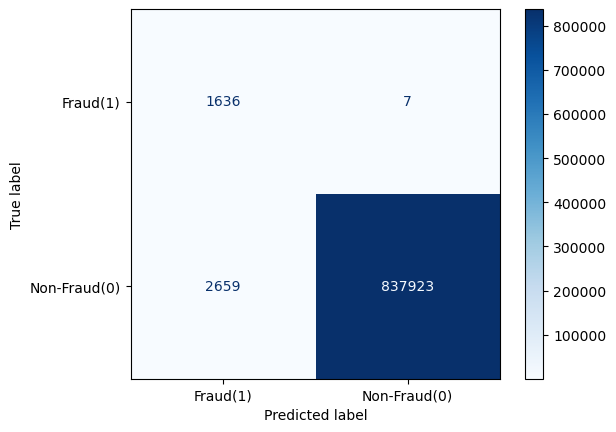

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=model.predict(X_val)   #XGBOOST
cm=confusion_matrix(y_test,y_pred,labels=[1,0]) #1 for fraud 0 for not fraud
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Fraud(1)','Non-Fraud(0)'])
disp.plot(cmap='Blues', values_format='d')


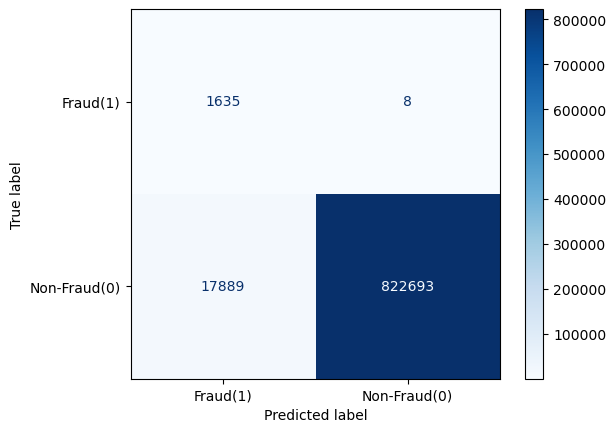

In [67]:
y_pred=rf_model.predict(X_val)   #RandomForest
cm=confusion_matrix(y_test,y_pred,labels=[1,0]) #1 for fraud 0 for not fraud
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Fraud(1)','Non-Fraud(0)'])
disp.plot(cmap='Blues', values_format='d')


In [54]:
import joblib

joblib.dump(model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']